# Hands-on clustering \#1: 
## Large Multi-spectral image segmentation: MARS

## 3. Data exploration

### 3.1. Read the data and understand the formatting

#### Import first required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 15

#### 3.1.1 Read the data

In [2]:
mars = pd.read_csv("../Data/mars.csv.zip")

#### 3.1.2 Display data summary

In [3]:
summary = mars.describe()
summary

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255
count,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,...,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000
mean,0.373672,0.408012,0.418404,0.420980,0.421814,0.421358,0.426807,0.429181,0.419277,0.418314,...,0.327834,0.358084,0.366237,0.341929,0.376129,0.394448,0.373834,0.370925,0.409842,0.413357
std,0.098974,0.080131,0.080369,0.081863,0.081315,0.080683,0.080681,0.081414,0.078250,0.077991,...,0.064647,0.056778,0.050779,0.059134,0.052337,0.056993,0.064088,0.062586,0.056333,0.053984
min,0.038469,0.233688,0.259045,0.269580,0.273937,0.274090,0.275866,0.274769,0.273685,0.274631,...,0.143893,0.193508,0.219910,0.174218,0.220138,0.215826,0.198084,0.186781,0.224686,0.219101
25%,0.299668,0.334763,0.343065,0.345050,0.344962,0.345116,0.350838,0.352490,0.346149,0.345396,...,0.272904,0.312169,0.330923,0.295109,0.339747,0.352853,0.324080,0.321077,0.369166,0.375433
50%,0.365481,0.388543,0.397193,0.399102,0.399245,0.398413,0.403601,0.407299,0.396357,0.394954,...,0.334283,0.362259,0.367263,0.344043,0.375732,0.397163,0.378828,0.372294,0.411261,0.414135
75%,0.445685,0.487916,0.502658,0.507322,0.508697,0.508175,0.512995,0.515465,0.503711,0.502607,...,0.379558,0.400942,0.398504,0.385884,0.409758,0.433080,0.420058,0.419563,0.447426,0.448774
max,0.832065,0.590190,0.580816,0.579686,0.580050,0.579551,0.584240,0.591300,0.569333,0.567649,...,0.559236,0.596519,2.304593,1.393481,0.661885,0.651398,0.624899,0.652349,0.699387,0.655508


#### 3.1.3 Data dimensions

In [4]:
mars_data = mars.to_numpy()
print("Number of pixels:  ", mars_data.shape[0])
print("Number of channels:", mars_data.shape[1])

Number of pixels:   38400
Number of channels: 255


### 3.2. Data preprocessing

#### 3.2.1 Histograms of six randomly selected wave lengths

Exploration of different wave length distributions


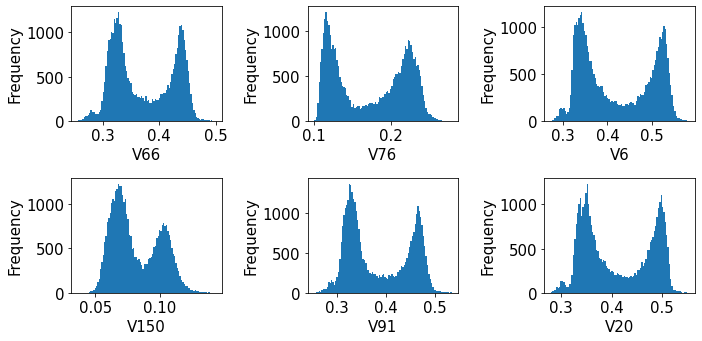

In [5]:
plot_index = np.random.randint(0, 255, 6)


print("Exploration of different wave length distributions")

for i in range(6):
#     plt.subplot(2, 3, 1)
#     plt.boxplot(mars_data[:, plot_index])
    plt.subplot(2, 3, i+1)
    plt.hist(mars_data[:, plot_index[i]], bins = 100)
    plt.xlabel("V%i" % (plot_index[i]+1))
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

##### Interpretation

We can see that some wave lengths have clearly different values from different kinds of pixels.\
For some dimensions, they could be used alone to define two distinct clusters easily.\
Overall, the six wave lengths selected appear to be more or less symmetric, although some right spikes are higher than the left spikes, it would not hurt to simply standardize the data.   

#### 3.2.2 Box plots of all wave lengths

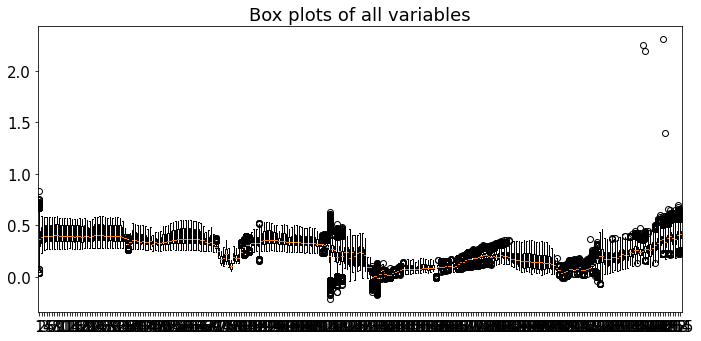

In [6]:
plt.boxplot(mars_data)
plt.title("Box plots of all variables")
plt.tight_layout()
plt.show()

##### Interpretations

Some dimentions (wave lengths) appear to have much wider spread than others $\rightarrow$ Need to normalize the data.\
Overall, the median appear to be centered in all the box plots. and they look rather symmetrical $\rightarrow$ Standardization

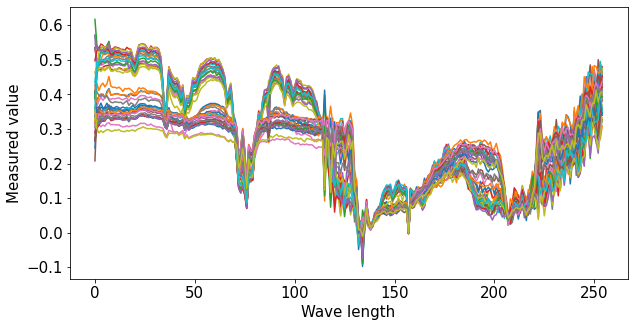

In [7]:
sample = mars_data[::1000]
x = np.arange(0, 255)

for i in range(sample.shape[0]):
    plt.plot(x, sample[i, :])
plt.xlabel("Wave length")
plt.ylabel("Measured value")
plt.show()

#### 3.2.4 Data standardization

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
mars_scaled = ss.fit_transform(mars_data)

Visualization of different wave length distributions after standard scaling


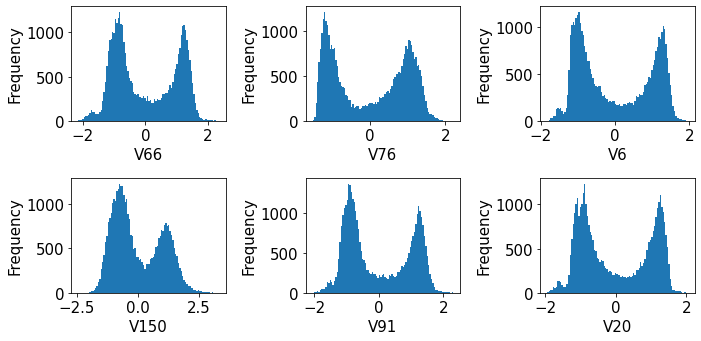

In [9]:
print("Visualization of different wave length distributions after standard scaling")

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist(mars_scaled[:, plot_index[i]], bins = 100)
    plt.xlabel("V%i" % (plot_index[i]+1))
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

##### Interpretation

Data are now centered around zero with a spread (standard deviation) of 1

### 3.3 Dimensionality reduction

#### 3.3.1 Conduct PCA

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
mars_pca = pca.fit_transform(mars_scaled)

#### 3.3.2 Visualize explained variance

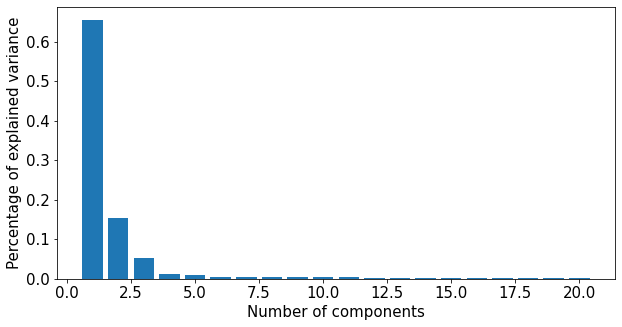

0.8601374108749605


In [11]:
explained_variance_ratio = pca.explained_variance_ratio_

n_bars = 20
x = np.arange(1, n_bars + 1)
plt.bar(x, explained_variance_ratio[:n_bars])

plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")
plt.show()

print(sum([explained_variance_ratio[i] for i in range(3)]))

##### Interpretation

The first three PCA components appear to be explaining most of the variance in the data.

#### 3.3.3 Variable factor map

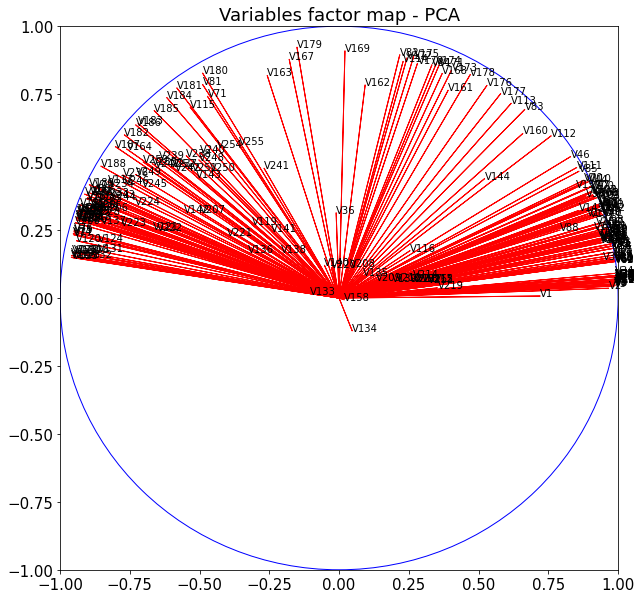

In [12]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, mars.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'b', fill = False))

plt.title('Variables factor map - PCA')
plt.show()

##### Interpretation

Most of the wave lengths have projection on the first two PCA dimensions with norm 1.\
Most of them are represented entirely by component 1, other entirely by component 2.\
Some isolated wave lengths are not well represented in the first two PCA dimensions.

#### 3.3.4 Individual factor maps

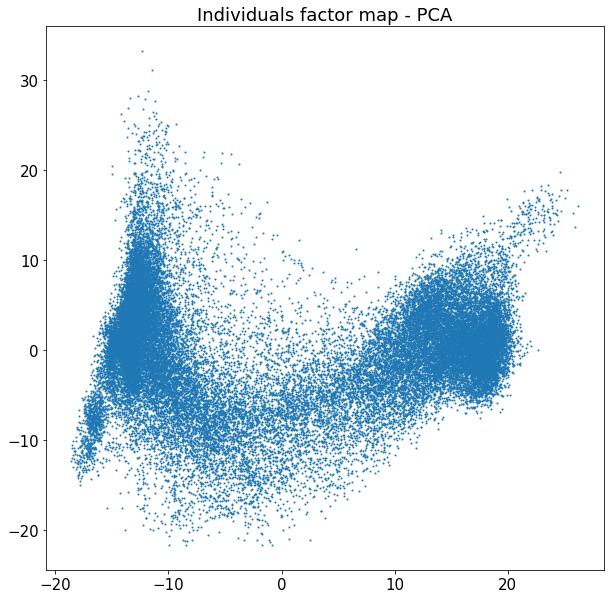

In [13]:
plt.figure(figsize=(10,10))

plt.scatter(mars_pca[:, 0], mars_pca[:, 1], s=1, linewidths=1)
plt.title("Individuals factor map - PCA")

plt.show()

##### Interpretations

It is hard to distinguish visually the five groups identified by experts.\
Two, three groups appear to be clearly present in the data.

#### 3.3.5 Reduce dimension to three

In [14]:
mars_reduced = mars_pca[:, :3]

## 4. Clustering

### 4.1. K-means

#### Additional imports 

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

#### 4.1.1 Choose the number of clusters

Either use the elbow method or the silhouette method

#### 4.1.2 Elbow method

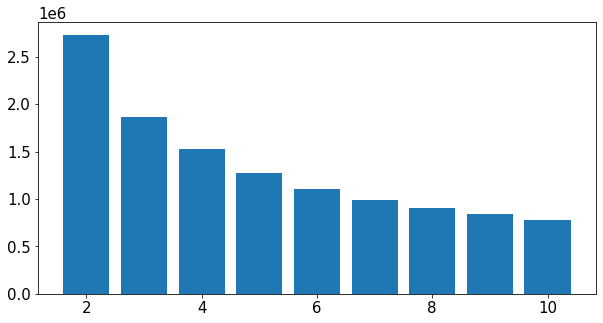

In [16]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mars_reduced)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.bar(range(2, 11), inertia[1:])
plt.show()

#### Interpretation

Choose K=5

#### 4.1.3 Apply K-means on PCA reduced data

In [17]:
kmeans_pca = KMeans(n_clusters=5, random_state=0)
clusters_pca = kmeans_pca.fit_predict(mars_reduced)

#### 4.1.4 Display results on individual factor map

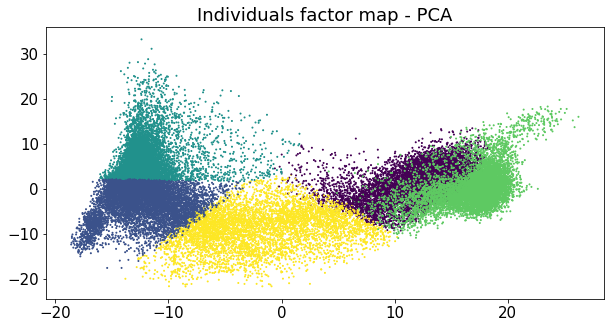

In [18]:
plt.scatter(mars_pca[:, 0], mars_pca[:, 1], c=clusters_pca, s=1, linewidths=1)
plt.title("Individuals factor map - PCA")

plt.show()

#### 4.1.5 Display the image of MARS geological composition found by clustering

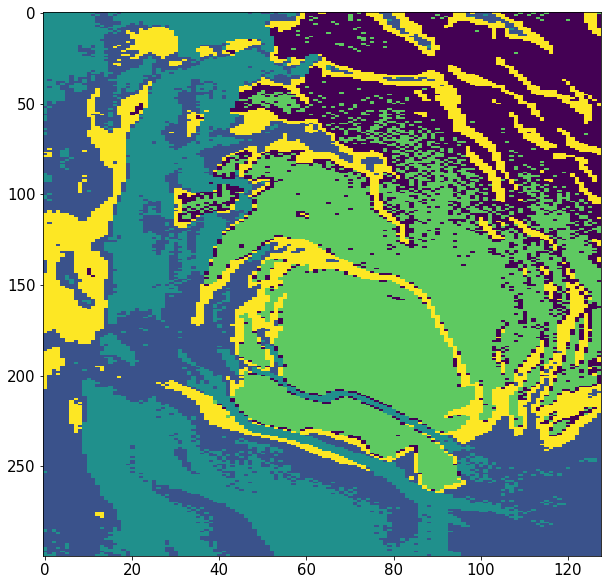

In [19]:
n_pixel_x = 300
n_pixel_y = 128

mars_image = clusters_pca.reshape((n_pixel_x, n_pixel_y))
plt.figure(figsize = (10,10))
plt.imshow(mars_image, interpolation="nearest", aspect="auto")
plt.show()

#### 4.1.6 Curve representing the wave lengths of the centroids

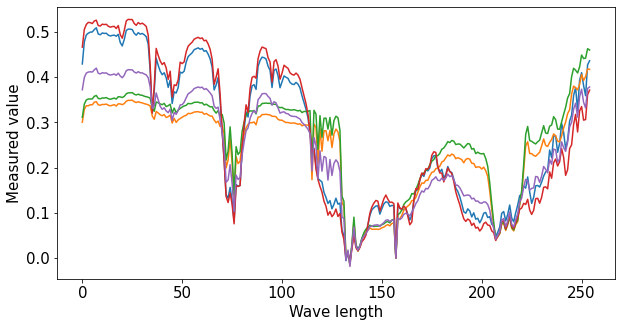

In [20]:
x = np.arange(0, 255)
for i in range(5):
    plt.plot(x, np.mean(mars_data[clusters_pca == i], axis = 0))
plt.xlabel("Wave length")
plt.ylabel("Measured value")
plt.show()

#### 4.1.7 Repeat the process with complete data and compare the results

In [21]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters_full = kmeans.fit_predict(mars_scaled, 5)

#### Import and use external metrics

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(clusters_full, clusters_pca)

array([[6138,    0,    0,  127,   99],
       [   0, 8753,  273,    0,    9],
       [  16,  284,    3,    1, 5230],
       [ 119,    0,    0, 9094,    1],
       [   2,   52, 8199,    0,    0]])

In [23]:
from sklearn.metrics import normalized_mutual_info_score, fowlkes_mallows_score

similarity_nmi = normalized_mutual_info_score(clusters_full, clusters_pca)
similarity_fm = fowlkes_mallows_score(clusters_full, clusters_pca)

print("Normalized Mutual Information score:", similarity_nmi)
print("Fowlkes Mallows score: ", similarity_fm)

Normalized Mutual Information score: 0.9225306492197736
Fowlkes Mallows score:  0.9517256678879067


##### Interpretations

The scores obtained with both external metrics are high, meaning that the classifications obtained are similar with and without PCA.

### 4.2 Agglomerative Clustering

#### 4.2.1. Choose the number of clusters

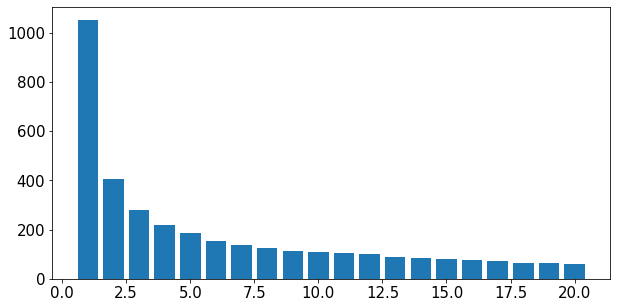

In [24]:
# Take only a fraction of the initial data to debug.
mars_reduced_samples = mars_reduced[::10]

ac = AgglomerativeClustering(n_clusters=5, linkage="ward",  compute_distances=True)
clusters_ac = ac.fit_predict(mars_reduced_samples)

distances = ac.distances_

n_sizes = 20
x = np.arange(n_sizes, 0, -1)
y = ac.distances_[-20:]

plt.bar(x, y)
plt.show()

##### Interpretation

In this plot, the first point is much higher than the other, making the y-scale of all the interesting points too small and making it hard to discover the elbow. $\rightarrow$ Remove the first point.

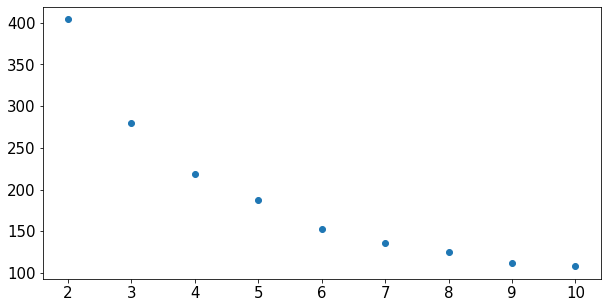

In [25]:
n_sizes = 10
x = np.arange(n_sizes, 1, -1)
y = ac.distances_[-n_sizes:-1]

plt.scatter(x, y)
plt.show()

##### Interpretation

In these plots, either three or five appear to be a smart choice for the number of clusters. It does not allow us to decide precisely what is the right number (maybe it does not even exist). However, it gives us the right range compared to what experts said (not 20, not 100). 

#### 4.2.2. Visualize agglomerative clustering

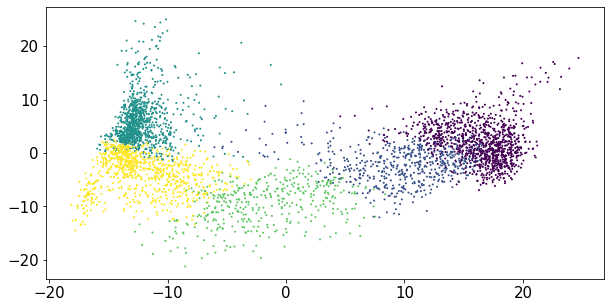

In [26]:
plt.scatter(mars_reduced_samples[:, 0], mars_reduced_samples[:, 1], c=clusters_ac, s=1, linewidths=1)

### 4.3. Gaussian Mixture Models

#### 4.3.1 Choose number of clusters and covariance constraints

In [27]:
from sklearn.mixture import GaussianMixture

n_components_range = range(2, 10)
cv_types = ["spherical", "tied", "diag", "full"]

bic = []
names = []
for cv in cv_types:
    for n_comp in n_components_range:
        names.append(cv + "__" + str(n_comp))
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cv, n_init=20)
        gmm.fit(mars_reduced_samples)
        bic.append(gmm.bic(mars_reduced_samples))

index = np.argmin(bic)
print(names[index], bic[index])

full__9 66916.84870667831


#### 4.3.1 Choose covariance constraint when number of clusters is fixed to 5

In [28]:
cv_types = ["spherical", "tied", "diag", "full"]

bic = []
names = []
for cv in cv_types:
    names.append(cv)
    gmm = GaussianMixture(n_components=n_comp, covariance_type=cv, n_init=20)
    gmm.fit(mars_reduced_samples)
    bic.append(gmm.bic(mars_reduced_samples))

index = np.argmin(bic)
print(names[index], bic[index])

full 66848.23527693051


#### 4.3.2 Apply GMM to MARS

In [29]:
gmm5 = GaussianMixture(n_components=5, covariance_type="full", n_init=50)
clusters_gmm5 = gmm5.fit_predict(mars_reduced_samples)

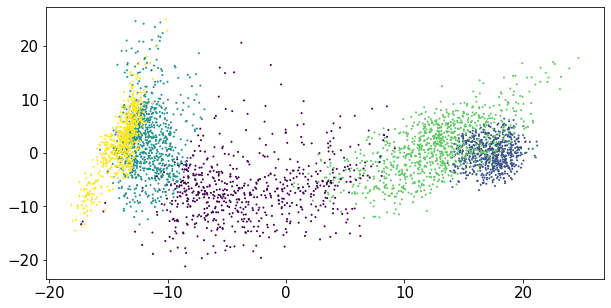

In [30]:
plt.scatter(mars_reduced_samples[:, 0], mars_reduced_samples[:, 1], c=clusters_gmm5, s=1, linewidths=1)

## 5. Comparison of clustering algorithms

### 5.1. Visualize experts ground truth

#### Load experts ground truth

In [31]:
clusters_expert = pd.read_csv("../Data/mask.csv")
clusters_expert = clusters_expert.to_numpy()
clusters_expert = np.reshape(clusters_expert, 38400)
clusters_expert_samples = clusters_expert[::10]

#### Visualize experts ground truth

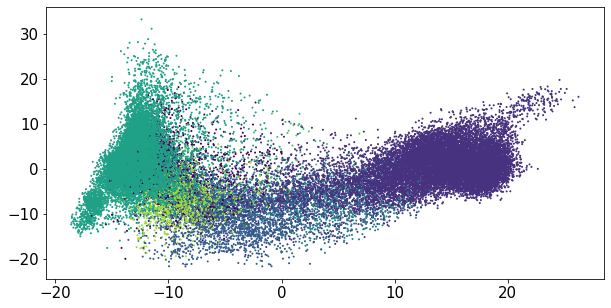

In [32]:
plt.scatter(mars_reduced[:, 0], mars_reduced[:, 1], c=clusters_expert, s=1, linewidths=1)

### 5.2 Compare different approaches

In [33]:
print("Results for K-means applied on first three dimensions of PCA")
print("FM :", fowlkes_mallows_score(clusters_pca, clusters_expert))
print("NMI:", normalized_mutual_info_score(clusters_pca, clusters_expert))

print()
print("Results for K-means applied on original data (normalized)")
print("FM :", fowlkes_mallows_score(clusters_full, clusters_expert))
print("NMI:", normalized_mutual_info_score(clusters_full, clusters_expert))

print()
print("Results for Agglomerative Clustering applied on PCA data (small subset, normalized)")
print("FM :", fowlkes_mallows_score(clusters_ac, clusters_expert_samples))
print("NMI:", normalized_mutual_info_score(clusters_ac, clusters_expert_samples))

print()
print("Results for Gaussian Mixtures applied on original data (normalized)")
print("FM :", fowlkes_mallows_score(clusters_gmm5, clusters_expert_samples))
print("NMI:", normalized_mutual_info_score(clusters_gmm5, clusters_expert_samples))

Results for K-means applied on first three dimensions of PCA
FM : 0.6015665557841873
NMI: 0.5387823662410469

Results for K-means applied on original data (normalized)
FM : 0.6058203494458227
NMI: 0.5458328072900561

Results for Agglomerative Clustering applied on PCA data (small subset, normalized)
FM : 0.6276636966595519
NMI: 0.5378671553934923

Results for Gaussian Mixtures applied on original data (normalized)
FM : 0.5914673348090168
NMI: 0.5529663795089738


#### Interpretation

Results appear relatively similar.\
There is some randomness in both versions of the algorithms (Random initialization for K-means, random subset of data for agglomerative clustering).\
To obtain more relevant results, several runs should be conducted and averaged for K-means and all the data should be used for agglomerative clustering.

#### Several runs for K-means

In [34]:
FMs = []
NMIs = []
for i in range(10):
    clusters = KMeans(5).fit_predict(mars_reduced)
    FMs.append(fowlkes_mallows_score(clusters, clusters_expert))
    NMIs.append(normalized_mutual_info_score(clusters, clusters_expert))
FMs = np.array(FMs)
NMIs = np.array(NMIs)

In [35]:
print("Results for K-means applied on first three dimensions of PCA")
print(u"FM : %f \u00B1 %f" % (FMs.mean(), FMs.std()))
print(u"NMI: %f \u00B1 %f" % (NMIs.mean(), NMIs.std()))

Results for K-means applied on first three dimensions of PCA
FM : 0.601599 ± 0.000872
NMI: 0.538545 ± 0.001097


##### Interpretation

Not so much variability in the end.

### 5.3 Try changing the number of clusters

In [36]:
kmeans_pca3 = KMeans(n_clusters=3, random_state=0)
clusters_pca3 = kmeans_pca3.fit_predict(mars_reduced)

print("Results for K-means applied on first three dimensions of PCA with three clusters")
print("FM :", fowlkes_mallows_score(clusters_pca3, clusters_expert))
print("NMI:", normalized_mutual_info_score(clusters_pca3, clusters_expert))

Results for K-means applied on first three dimensions of PCA with three clusters
FM : 0.8165784077615612
NMI: 0.6208164886063496


In [37]:
kmeans_pca4 = KMeans(n_clusters=4, random_state=0)
clusters_pca4 = kmeans_pca4.fit_predict(mars_reduced)

print("Results for K-means applied on first three dimensions of PCA with four clusters")
print("FM :", fowlkes_mallows_score(clusters_pca4, clusters_expert))
print("NMI:", normalized_mutual_info_score(clusters_pca4, clusters_expert))

Results for K-means applied on first three dimensions of PCA with four clusters
FM : 0.7287764272206007
NMI: 0.5817489701922104


In [38]:
kmeans_pca5 = KMeans(n_clusters=5, random_state=0)
clusters_pca5 = kmeans_pca5.fit_predict(mars_reduced)

print("Results for K-means applied on first three dimensions of PCA with five clusters")
print("FM :", fowlkes_mallows_score(clusters_pca5, clusters_expert))
print("NMI:", normalized_mutual_info_score(clusters_pca5, clusters_expert))

Results for K-means applied on first three dimensions of PCA with five clusters
FM : 0.6015665557841873
NMI: 0.5387823662410469


In [39]:
kmeans_pca6 = KMeans(n_clusters=6, random_state=0)
clusters_pca6 = kmeans_pca6.fit_predict(mars_reduced)

print("Results for K-means applied on first three dimensions of PCA with five clusters")
print("FM :", fowlkes_mallows_score(clusters_pca6, clusters_expert))
print("NMI:", normalized_mutual_info_score(clusters_pca6, clusters_expert))

Results for K-means applied on first three dimensions of PCA with five clusters
FM : 0.5782780021268644
NMI: 0.5290323248083191


##### Interpretations

Better with less than 5 clusters. There is two large natural clusters in the data (the one on the right and the one on the left). The other three appear to be more subjective, i.e., using expert knowledge that we do not know. When we force the clustering to be 5, it tends to split the large natural clusters, which is not desirable. This way, it reduces the FM and NMI values.

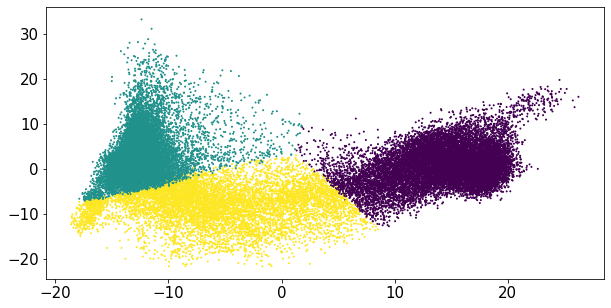

In [40]:
# Kmeans 3 clusters
plt.scatter(mars_pca[:, 0], mars_pca[:, 1], c=clusters_pca3, s=1, linewidths=1)
plt.show()

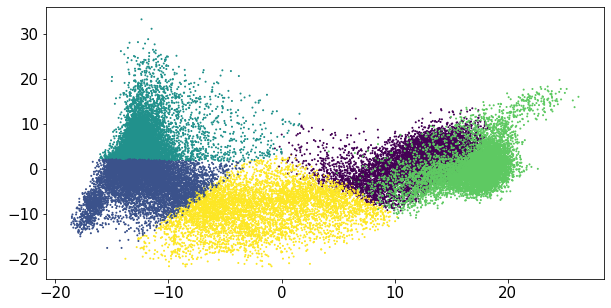

In [41]:
# Kmeans 5 clusters
plt.scatter(mars_pca[:, 0], mars_pca[:, 1], c=clusters_pca5, s=1, linewidths=1)
plt.show()

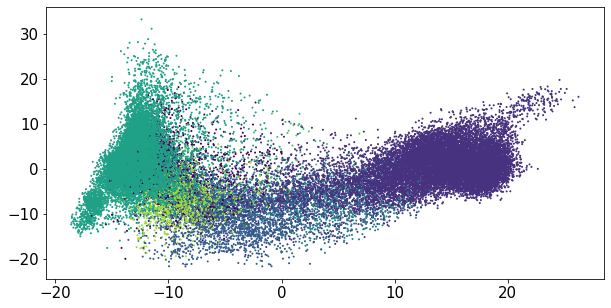

In [42]:
# Experts 
plt.scatter(mars_pca[:, 0], mars_pca[:, 1], c=clusters_expert, s=1, linewidths=1)
plt.show()